In [1]:
from qiskit                 import QuantumCircuit, transpile
from qiskit.circuit         import Parameter
from qiskit.circuit.library import qaoa_ansatz
from qiskit_aer             import AerSimulator
from qiskit.visualization   import plot_histogram
from qiskit.primitives      import StatevectorEstimator as Estimator
from scipy.optimize         import minimize
from qiskit.quantum_info    import SparsePauliOp

In [2]:
Hp = SparsePauliOp(["ZZII","IZZI","IIZZ","ZIIZ"])

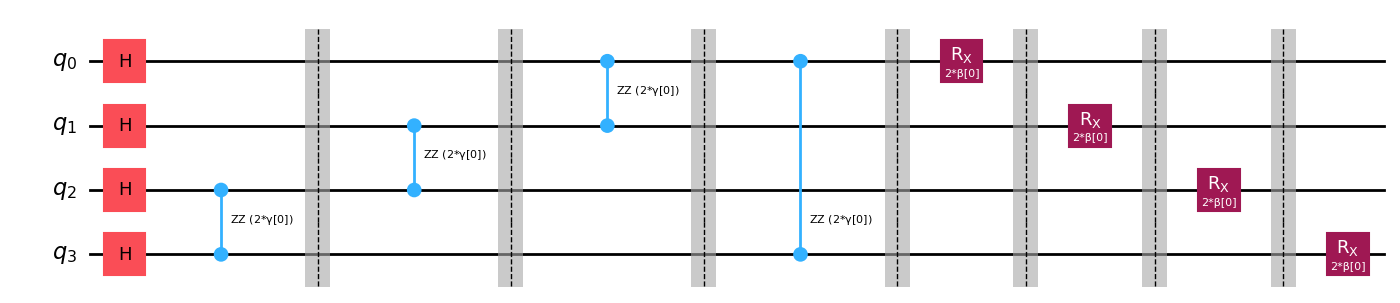

In [3]:
circuit = qaoa_ansatz(Hp,reps=1,insert_barriers=True)
circuit.draw('mpl')

In [4]:
def objective_function_qaoa(theta):
    circuit = qaoa_ansatz(Hp,reps=1,insert_barriers=True)
    circuit = circuit.assign_parameters(theta)
    estimator = Estimator()
    job = estimator.run([(circuit,Hp)])
    result = job.result()
    expectation_value = result[0].data.evs.real
    return expectation_value

In [5]:
res_qaoa = minimize(objective_function_qaoa,[1,1],method='COBYLA')
res_qaoa

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.9999998743661536
       x: [ 1.964e+00  1.178e+00]
    nfev: 43
   maxcv: 0.0

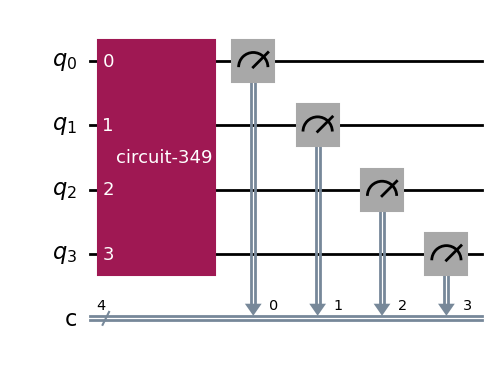

In [6]:
qc = QuantumCircuit(4,4)
ansatz = qaoa_ansatz(Hp,reps=1,insert_barriers=True)
ansatz = ansatz.assign_parameters(res_qaoa.x)
qc.append(ansatz,range(4))
qc.measure(range(4),range(4))
qc.draw('mpl')

In [7]:
backend     = AerSimulator()
qc_compiled = transpile(qc,backend)
job         = backend.run(qc_compiled, shots = 2048)
result      = job.result()
counts      = result.get_counts()

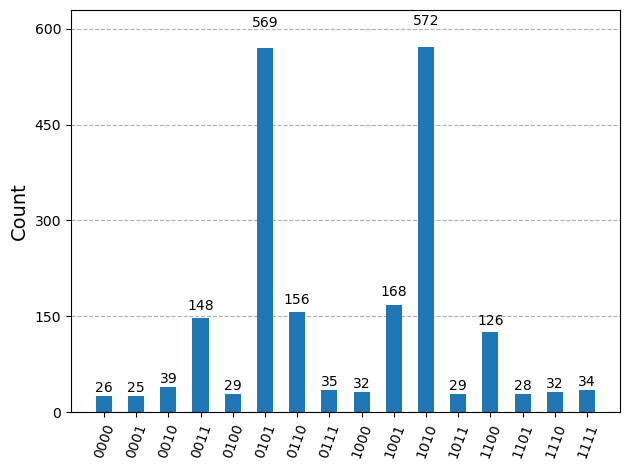

In [8]:
plot_histogram(counts)